<a href="https://colab.research.google.com/github/wonjae11/AI_TEST/blob/main/04_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 04. 자동미분

In [1]:
import torch

### 4-1. requires_grad

In [5]:
x = torch.rand(3, requires_grad=True)
print(x)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)

tensor([0.9523, 0.0217, 0.9637], requires_grad=True)
None
None
True


In [7]:
y = 2 * x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([1.9045, 0.0435, 1.9274], grad_fn=<MulBackward0>)
None
True


<ipython-input-7-9c3e4a13d414>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(y.grad)


In [8]:
z = y ** 2
print(z)
print(z.grad)
print(z.grad_fn)
print(z.requires_grad)

tensor([3.6271e+00, 1.8881e-03, 3.7148e+00], grad_fn=<PowBackward0>)
None
True


<ipython-input-8-3f89fad9a690>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(z.grad)


### 4-2. Backward()
- x -> y -> z 계산에서 역전파를 통해 기울기를 구함

In [9]:
result = z.sum()
result.backward()

In [10]:
print(z)
print(x.grad)

tensor([3.6271e+00, 1.8881e-03, 3.7148e+00], grad_fn=<PowBackward0>)
tensor([7.6180, 0.1738, 7.7095])


### 4-3. no_grad()
- 역전파를 중지

In [14]:
x = torch.tensor(1.0, requires_grad=True)
print(x.requires_grad)
# print((x ** 2).requires_grad)

with torch.no_grad():
  y = x ** 2
  print(x.requires_grad)
  print(y.requires_grad)

True
True
False


### 3-4. detach()

In [15]:
y.detach()

tensor(1.)

### 실습. 선형 회귀 실습

Epoch [50/1000], Loss: 4.5001
Epoch [100/1000], Loss: 4.4372
Epoch [150/1000], Loss: 4.3990
Epoch [200/1000], Loss: 4.3758
Epoch [250/1000], Loss: 4.3616
Epoch [300/1000], Loss: 4.3530
Epoch [350/1000], Loss: 4.3478
Epoch [400/1000], Loss: 4.3446
Epoch [450/1000], Loss: 4.3427
Epoch [500/1000], Loss: 4.3415
Epoch [550/1000], Loss: 4.3408
Epoch [600/1000], Loss: 4.3404
Epoch [650/1000], Loss: 4.3401
Epoch [700/1000], Loss: 4.3400
Epoch [750/1000], Loss: 4.3399
Epoch [800/1000], Loss: 4.3398
Epoch [850/1000], Loss: 4.3398
Epoch [900/1000], Loss: 4.3398
Epoch [950/1000], Loss: 4.3397
Epoch [1000/1000], Loss: 4.3397


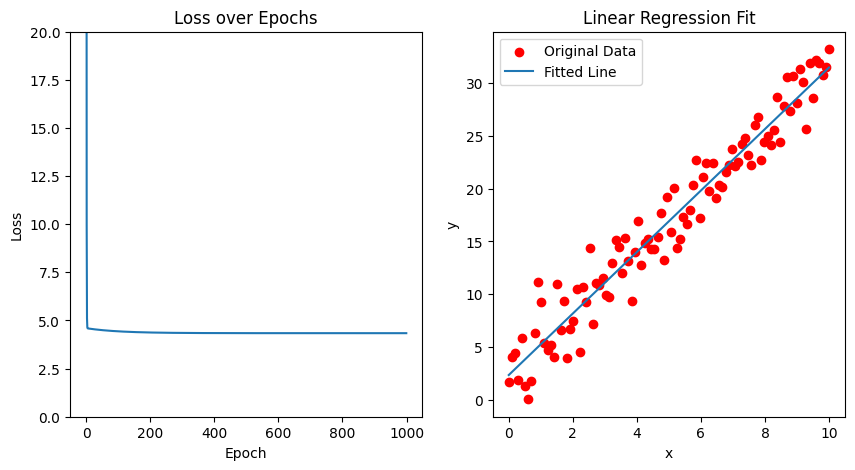

In [33]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. 입출력 정의
x = torch.linspace(0, 10, 100).view(-1, 1)
y = 3 * x + 2 + torch.randn(100, 1) * 2

# 2. 모델 만들기
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    return self.linear(x)

model = LinearRegressionModel()

# 3. 손실함수 정의
# 손실함수 선택
loss_function = nn.MSELoss()

# 4. 가중치 업데이트
# 경사하강법 -> 어떤 것을 사용할지 선택
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 5. 학습 반복
epochs = 1000
losses = []

for epoch in range(epochs):
  optimizer.zero_grad() # 기울기 초기화
  outputs = model(x) # 예측값 계산
  loss = loss_function(outputs, y) # 손실 계산
  loss.backward() # 역전파
  optimizer.step() # 가중치 업데이트

  losses.append(loss.item()) # 손실값 저장

  if (epoch + 1) % 50 == 0:
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')


# 6. 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(losses, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 20)

# 데이터와 예측 결과 시각화
plt.subplot(1,2,2)
plt.scatter(x.numpy(), y.numpy(), color = 'red', label='Original Data')
plt.plot(x.numpy(), model(x).detach().numpy(), label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 최종 모델 파라미터 확인
print("Model parameters")
for name, param in model.named_parameters():
  print(f"{name}: {param.data}")
